In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,models,layers

In [3]:
import PIL
import cv2
import os

In [4]:
import pathlib
data_dir=pathlib.Path('dataset/train')
data_dir

WindowsPath('dataset/train')

In [5]:
fruit_image={
     'fresh':list(data_dir.glob('fresh/*')),
     'rotten':list(data_dir.glob('rotten/*'))
 }

In [21]:
len(fruit_image['fresh']),len(fruit_image['rotten'])

(5904, 7695)

In [7]:
fruit_label={
    'fresh':0,
    'rotten':1,
}

In [9]:
x,y=[],[]
for fruit_quality,images in fruit_image.items():
    for image in images:
        img=cv2.imread(str(image))
        x.append(img)
        y.append(fruit_label[fruit_quality])


In [20]:
from collections import Counter
print(Counter(y))

Counter({1: 7695, 0: 5904})


In [19]:
print(fruit_image['rotten'][8901])

IndexError: list index out of range

Text(0.5, 1.0, 'rotten')

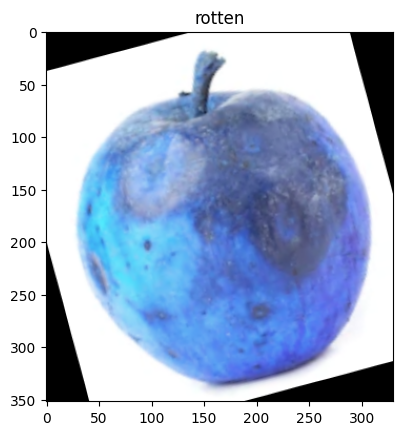

In [23]:
# visualize the image stored in x and its corresponding label in y
plt.imshow(x[5905])
# reverse the fruit_label dictionary to map int to class name
label_map = {v: k for k, v in fruit_label.items()}
plt.title(label_map[y[8901]])


In [ ]:

img_shape = (180, 180)
x_resized = [cv2.resize(img, img_shape) for img in x]
x = np.array(x_resized)

In [ ]:
y= np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(10879, 180, 180, 3)

In [ ]:
y_train.shape

(10879,)

In [ ]:
x_train= x_train / 255.0
x_test= x_test / 255.0

MemoryError: Unable to allocate 7.88 GiB for an array with shape (10879, 180, 180, 3) and data type float64

In [ ]:
x_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.95686275, 0.96862745, 0.96470588],
        [0.95686275, 0.96078431, 0.96862745],
        [0.95686275, 0

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.8),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomFlip("vertical"),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.3),
])

e:\fruit_project\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
fruit_model=models.Sequential([
    data_augmentation
    layers.Conv2D(32,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5,activation='softmax')
])

fruit_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

fruit_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 831,653 (3.17 MB)

 Trainable params: 831,653 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
fruit_model.fit(x_train, y_train,epochs=10, validation_data=(x_test, y_test),callbacks=[early_stop])

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 141s 366ms/step - accuracy: 0.7131 - loss: 0.6372 - val_accuracy: 0.8776 - val_loss: 0.2736
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 100s 291ms/step - accuracy: 0.9046 - loss: 0.2381 - val_accuracy: 0.9154 - val_loss: 0.2095
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 111s 326ms/step - accuracy: 0.9143 - loss: 0.2084 - val_accuracy: 0.9397 - val_loss: 0.1630
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 115s 337ms/step - accuracy: 0.9403 - loss: 0.1528 - val_accuracy: 0.9338 - val_loss: 0.1499
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 106s 310ms/step - accuracy: 0.9492 - loss: 0.1294 - val_accuracy: 0.9202 - val_loss: 0.2053
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 99s 291ms/step - accuracy: 0.9458 - loss: 0.1378 - val_accuracy: 0.9493 - val_loss: 0.1222
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 99s 292ms/step - accuracy: 0.9612 - loss: 0.1003 - val_accuracy: 0.9423 - val_loss: 0.1312
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 101s 296ms/step - accuracy: 0.9667 - l

In [ ]:
fruit_model.evaluate(x_test, y_test)


85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9748 - loss: 0.0657


[0.07137806713581085, 0.9709559082984924]

In [ ]:
fruit_model.save('fruit_quality_model1.h5')

In [25]:
from PIL import Image

In [36]:
model = keras.models.load_model('fruit_quality_model.h5')

image_path=r'dataset\train\rotten\rotated_by_15_Screen Shot 2018-06-07 at 2.15.50 PM.png'
img = cv2.imread(image_path)

img = cv2.resize(img, (180, 180))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted class: 1


In [37]:
print(label_map[predicted_class])

rotten
